In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math as m

In [4]:
def infinte_cube_AVG(img):

    new_img = cv2.resize(img, (2*img.shape[1], img.shape[0]))

    # Make the height and width of even number
    if new_img.shape[0]%2 != 0:
        new_img = new_img[0:-1, :, :]
    if new_img.shape[1]%2 != 0:
        new_img = new_img[:, 0:-1, :]
#     plt.imshow(new_img)
#     plt.show()
#     new_img.shape

    # Split image vertically into top image and bottom image
    height, width, channels = new_img.shape
    half_height = height//2

    top_img, bottom_img = new_img[:half_height, :], new_img[half_height:, :]

#     plt.imshow(top_img)
#     plt.show()
#     plt.imshow(bottom_img)
#     plt.show()
#     top_img.shape, bottom_img.shape

    # Perform avg operation between top and bottom section of images
    tr, tg, tb = cv2.split(top_img)
    br, bg, bb = cv2.split(bottom_img)

    rr, rg, rb = ((tr + br) / 2).astype(np.uint8), ((tg + bg) / 2).astype(np.uint8), ((tb + bb) / 2).astype(np.uint8)
    XOR_img = cv2.merge((rr, rg, rb))
#     top_img = cv2.merge(tr, tg, tb)
#     bottom_img = cv2.merge(br, bg, bb)


#     XOR_img = int((top_img + bottom_img)/2)

#     plt.imshow(XOR_img)

    # Split image into 4 equal parts
    height, width, channels = XOR_img.shape
    quarter_width = width//4

    if width%4 != 0:
        quarter_width = int(width//4)
        reduce_dim = width%4
        XOR_img = XOR_img[:, 1:XOR_img.shape[1]-reduce_dim+1, :]
    img1, img2, img3, img4 = XOR_img[:, 0:quarter_width], XOR_img[:, quarter_width: 2*quarter_width], XOR_img[:, 2*quarter_width:3*quarter_width], XOR_img[:, 3*quarter_width:]
#     plt.imshow(img1)
#     plt.show()
#     plt.imshow(img2)
#     plt.show()
#     plt.imshow(img3)
#     plt.show()
#     plt.imshow(img4)
#     plt.show()

    # Create new top and bottom images by merging middle two images and two outermost images respectively
    top_img = cv2.hconcat([img2, img3])
    bottom_img = cv2.hconcat([img1, img4])

#     plt.imshow(top_img)
#     plt.show()
#     plt.imshow(bottom_img)
#     plt.show()

    # Form the image of originaly shape by concatenating the two images vertically
    new_img = cv2.vconcat([top_img, bottom_img])
#     plt.imshow(new_img)
#     new_img.shape

    # Expand vertically
    new_img = cv2.resize(new_img, (new_img.shape[1], 2*new_img.shape[0]))
#     plt.imshow(new_img)
#     plt.show()
#     new_img.shape

    # Split image horizontally into left image and right image
    height, width, channels = new_img.shape
    half_width = width//2

    left_img, right_img = new_img[:, :half_width], new_img[:, half_width:]

#     plt.imshow(left_img)
#     plt.show()
#     plt.imshow(right_img)
#     plt.show()
#     left_img.shape, right_img.shape

    # Perform XOR operation between left and right section of images
    tr, tg, tb = cv2.split(left_img)
    br, bg, bb = cv2.split(right_img)

    rr, rg, rb = ((tr + br) / 2).astype(np.uint8), ((tg + bg) / 2).astype(np.uint8), ((tb + bb) / 2).astype(np.uint8)
    XOR_img = cv2.merge((rr, rg, rb))


#     plt.imshow(XOR_img)

    # Split image into 4 equal parts
    height, width, channels = XOR_img.shape
    quarter_height = height//4

    if height%4 != 0:
        quarter_height = int(height//4)
        reduce_dim = height%4
        XOR_img = XOR_img[1:XOR_img.shape[1]-reduce_dim+1, :, :]

    img1, img2, img3, img4 = XOR_img[0:quarter_height, :], XOR_img[quarter_height:2*quarter_height, :], XOR_img[2*quarter_height:3*quarter_height, :], XOR_img[3*quarter_height:, :]
#     plt.imshow(img1)
#     plt.show()
#     plt.imshow(img2)
#     plt.show()
#     plt.imshow(img3)
#     plt.show()
#     plt.imshow(img4)
#     plt.show()

    # Create new left and right images by merging middle two images and two outermost images respectively
    left_img = cv2.vconcat([img2, img3])
    right_img = cv2.vconcat([img1, img4])

#     plt.imshow(left_img)
#     plt.show()
#     plt.imshow(right_img)
#     plt.show()

    # Form the image of originaly shape by concatenating the two images vertically
    new_img = cv2.hconcat([left_img, right_img])
#     plt.imshow(new_img)
#     new_img.shape

    return new_img

In [5]:
def infinte_cube_XOR(img):
    ''' Perform atomic operations on image similar to infinity cube. On performing these steps 'n' times, we can generate the biometric template.
        Input:
            img: The input image
        Output:
            returns the image after performing atomic operation once
    '''
    # Make width dimension even, if it is not
    if img.shape[1]%2 != 0:
        img = img[:, 0:img.shape[1]-1, :]

    # Expand horizontally
    new_img = cv2.resize(img, (2*img.shape[1], img.shape[0]))

    # Make the height and width of even number
    if new_img.shape[0]%2 != 0:
        new_img = new_img[0:-2, :, :]
    if new_img.shape[1]%2 != 0:
        new_img = new_img[:, 0:-2, :]
#     plt.imshow(new_img)
#     plt.show()
#     new_img.shape

    # Split image vertically into top image and bottom image
    height, width, channels = new_img.shape
    half_height = height//2

    top_img, bottom_img = new_img[:half_height, :], new_img[half_height:, :]

#     plt.imshow(top_img)
#     plt.show()
#     plt.imshow(bottom_img)
#     plt.show()
#     top_img.shape, bottom_img.shape

    # Perform XOR operation between top and bottom section of images
    XOR_img = np.bitwise_xor(top_img, bottom_img)

#     plt.imshow(XOR_img)

    # Split image into 4 equal parts
    height, width, channels = XOR_img.shape
    quarter_width = width//4
    if width%4 != 0:
        quarter_width = int(width//4)
        XOR_img = XOR_img[:, 1:XOR_img.shape[1]-1, :]

    img1, img2, img3, img4 = XOR_img[:, 0:quarter_width], XOR_img[:, quarter_width: 2*quarter_width], XOR_img[:, 2*quarter_width:3*quarter_width], XOR_img[:, 3*quarter_width:]

#     plt.imshow(img1)
#     plt.show()
#     plt.imshow(img2)
#     plt.show()
#     plt.imshow(img3)
#     plt.show()
#     plt.imshow(img4)
#     plt.show()

    # Create new top and bottom images by merging middle two images and two outermost images respectively
    top_img = cv2.hconcat([img2, img3])
    bottom_img = cv2.hconcat([img1, img4])

#     plt.imshow(top_img)
#     plt.show()
#     plt.imshow(bottom_img)
#     plt.show()

    # Form the image of originaly shape by concatenating the two images vertically
#     print(top_img.shape)
#     print(bottom_img.shape)
    new_img = cv2.vconcat([top_img, bottom_img])

#     plt.imshow(new_img)
#     new_img.shape

    # Expand vertically
    new_img = cv2.resize(new_img, (new_img.shape[1], 2*new_img.shape[0]))

#     plt.imshow(new_img)
#     plt.show()
#     new_img.shape

    # Split image horizontally into left image and right image
    height, width, channels = new_img.shape
    half_width = width//2

    left_img, right_img = new_img[:, :half_width], new_img[:, half_width:]

#     plt.imshow(left_img)
#     plt.show()
#     plt.imshow(right_img)
#     plt.show()
#     left_img.shape, right_img.shape

    # Perform XOR operation between left and right section of images
    XOR_img = np.bitwise_xor(left_img, right_img)

#     plt.imshow(XOR_img)

    # Split image into 4 equal parts
    height, width, channels = XOR_img.shape
    quarter_height = height//4

    img1, img2, img3, img4 = XOR_img[0:quarter_height, :], XOR_img[quarter_height:2*quarter_height, :], XOR_img[2*quarter_height:3*quarter_height, :], XOR_img[3*quarter_height:, :]

#     plt.imshow(img1)
#     plt.show()
#     plt.imshow(img2)
#     plt.show()
#     plt.imshow(img3)
#     plt.show()
#     plt.imshow(img4)
#     plt.show()

    # Create new left and right images by merging middle two images and two outermost images respectively
    left_img = cv2.vconcat([img2, img3])
    right_img = cv2.vconcat([img1, img4])

#     plt.imshow(left_img)
#     plt.show()
#     plt.imshow(right_img)
#     plt.show()

    # Form the image of originaly shape by concatenating the two images vertically
    new_img = cv2.hconcat([left_img, right_img])
#     plt.imshow(new_img)
#     new_img.shape

    return new_img

In [6]:
def infinte_cube_with_exchange(img):
    ''' Perform atomic operations on image similar to infinity cube. On performing these steps 'n' times, we can generate the biometric template.
        Input:
            img: The input image
        Output:
            returns the image after performing atomic operation once
    '''
    # Make width dimension even, if it is not
    if img.shape[1]%2 != 0:
        img = img[:, 0:img.shape[1]-1, :]

#     # Expand horizontally
#     new_img = cv2.resize(img, (2*img.shape[1], img.shape[0]))
    new_img = img.copy()

    # Make the height and width of even number
    if new_img.shape[0]%2 != 0:
        new_img = new_img[0:-2, :, :]
    if new_img.shape[1]%2 != 0:
        new_img = new_img[:, 0:-2, :]
#     plt.imshow(new_img)
#     plt.show()
#     new_img.shape

    # Split image vertically into top image and bottom image
    height, width, channels = new_img.shape
    half_height = height//2

    top_img, bottom_img = new_img[:half_height, :], new_img[half_height:, :]

#     plt.imshow(top_img)
#     plt.show()
#     plt.imshow(bottom_img)
#     plt.show()
#     top_img.shape, bottom_img.shape

    # Exchange top and bottom pixel values
    exch_img = cv2.vconcat([bottom_img, top_img])


    # Split image into 4 equal parts
    height, width, channels = exch_img.shape
    quarter_width = width//4
    if width%4 != 0:
        quarter_width = int(width//4)
        exch_img = exch_img[:, 1:exch_img.shape[1]-1, :]

    img1, img2, img3, img4 = exch_img[:, 0:quarter_width], exch_img[:, quarter_width: 2*quarter_width], exch_img[:, 2*quarter_width:3*quarter_width], exch_img[:, 3*quarter_width:]

#     plt.imshow(img1)
#     plt.show()
#     plt.imshow(img2)
#     plt.show()
#     plt.imshow(img3)
#     plt.show()
#     plt.imshow(img4)
#     plt.show()

    # Create new top and bottom images by merging middle two images and two outermost images respectively
    top_img = cv2.hconcat([img2, img3])
    bottom_img = cv2.hconcat([img1, img4])

#     plt.imshow(top_img)
#     plt.show()
#     plt.imshow(bottom_img)
#     plt.show()

    # Form the image of originaly shape by concatenating the two images vertically
#     print(top_img.shape)
#     print(bottom_img.shape)
    new_img = cv2.vconcat([top_img, bottom_img])

#     plt.imshow(new_img)
#     new_img.shape

#     # Expand vertically
    new_img = cv2.resize(new_img, (img.shape[1], img.shape[0]))
#     plt.imshow(new_img)
#     plt.show()
#     new_img.shape

    # Split image horizontally into left image and right image
    height, width, channels = new_img.shape
    half_width = width//2

    left_img, right_img = new_img[:, :half_width], new_img[:, half_width:]

#     plt.imshow(left_img)
#     plt.show()
#     plt.imshow(right_img)
#     plt.show()
#     left_img.shape, right_img.shape

    # Exchange left and right sub-images
    exch_img = cv2.vconcat([right_img, left_img])

    # Split image into 4 equal parts
    height, width, channels = exch_img.shape
    quarter_height = height//4

    img1, img2, img3, img4 = exch_img[0:quarter_height, :], exch_img[quarter_height:2*quarter_height, :], exch_img[2*quarter_height:3*quarter_height, :], exch_img[3*quarter_height:, :]

#     plt.imshow(img1)
#     plt.show()
#     plt.imshow(img2)
#     plt.show()
#     plt.imshow(img3)
#     plt.show()
#     plt.imshow(img4)
#     plt.show()

    # Create new left and right images by merging middle two images and two outermost images respectively
    left_img = cv2.vconcat([img2, img3])
    right_img = cv2.vconcat([img1, img4])

#     plt.imshow(left_img)
#     plt.show()
#     plt.imshow(right_img)
#     plt.show()

    # Form the image of originaly shape by concatenating the two images vertically
    new_img = cv2.hconcat([left_img, right_img])
#     plt.imshow(new_img)
#     new_img.shape

    return new_img

In [7]:
# Generate template for a given image
def inf_cube_with_itr(icwi_img, iterations):
    ''' Create a template for the given image with specified number of iterations
        Input:
            icwi_img: an image for which we want to generate the template
            iterations: the nuber of times we want to perform infinty cube transforamtions to generate the tempalte
        Output:
            returns the generated template for the given input image
    '''
    icwi_template = icwi_img.copy()
    for _ in range(iterations):
        icwi_template = infinte_cube(icwi_template)
    return icwi_template


# Generate tempalte for whole batch at once
def gen_batch_template(gbt_imgs):
    ''' Generate a set of templates for the given set of images
        Input:
            gbt_imgs: a list of input images
        Output:
            returns the generated template for every image present in the input set
    '''
    gbt_temp = []
    for gbt_img_temp in gbt_imgs:
        gbt_img_temp = np.array(gbt_img_temp, dtype= 'uint8')
        gbt_img_temp = inf_cube_with_itr(gbt_img_temp, iterations)
        gbt_temp.append(gbt_img_temp)
    return gbt_temp

(252, 252, 3)

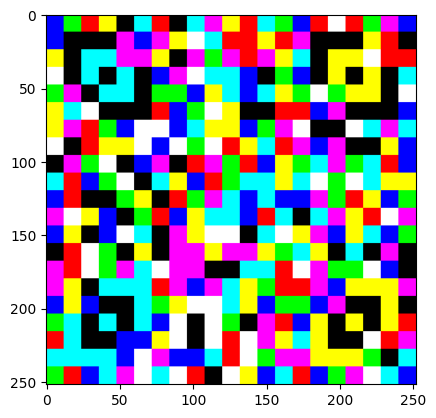

In [8]:
# Load image
img = cv2.imread('/content/1_jabcode.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img.shape

# ************************************ Atomic steps ************************************

(252, 252, 3)

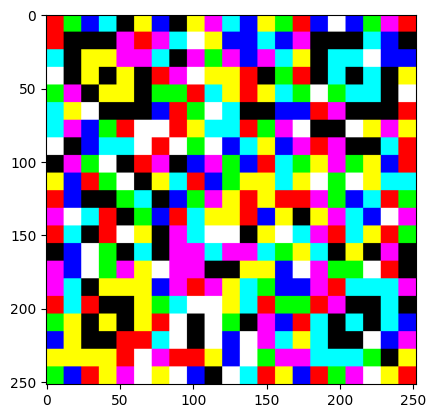

In [11]:
img = cv2.imread('/content/1_jabcode.png')
# img = cv2.imread('img1.png')
# img = cv2.imread('arnold_sample.jpg')

plt.imshow(img)
if img.shape[1]%2 != 0:
    img = img[:, 0:img.shape[1]-1, :]
plt.imsave('/content/atomic_steps/orig_img.png', img)
img.shape

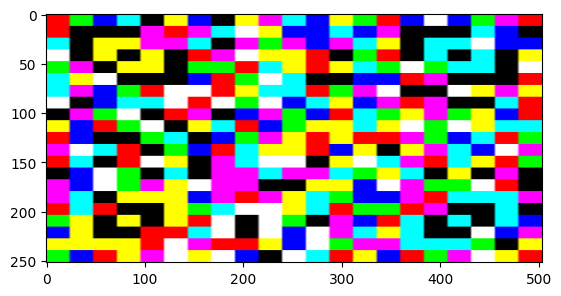

(252, 504, 3)

In [15]:
# # Expand horizontally
new_img = cv2.resize(img, (2*img.shape[1], img.shape[0]))
# new_img = img.copy()
plt.imshow(new_img)
plt.show()
plt.imsave('/content/atomic_steps/step1.png', new_img)
new_img.shape

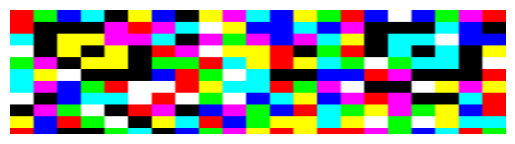

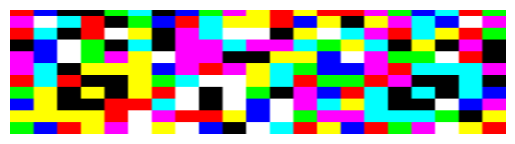

((126, 504, 3), (126, 504, 3))

In [16]:
# Split image vertically into top image and bottom image
height, width, channels = new_img.shape
half_height = height//2

top_img, bottom_img = new_img[:half_height, :], new_img[half_height:, :]

plt.imshow(top_img)
plt.axis('off')
plt.show()

plt.imshow(bottom_img)
plt.axis('off')
plt.show()

plt.imsave('/content/atomic_steps/step2.1.png', top_img)
plt.imsave('/content/atomic_steps/step2.2.png', bottom_img)
top_img.shape, bottom_img.shape

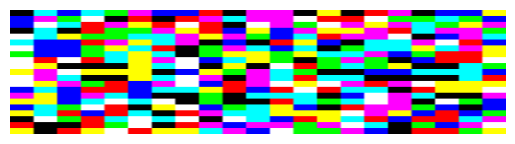

In [18]:
# # Perform XOR operation between top and bottom section of images
XOR_img = top_img ^ bottom_img
# exch_img = cv2.vconcat([bottom_img, top_img])

plt.imshow(XOR_img)
# plt.imshow(exch_img)
plt.axis('off')

plt.imsave('/content/atomic_steps/step2.3.png', XOR_img)
# XOR_img.shape

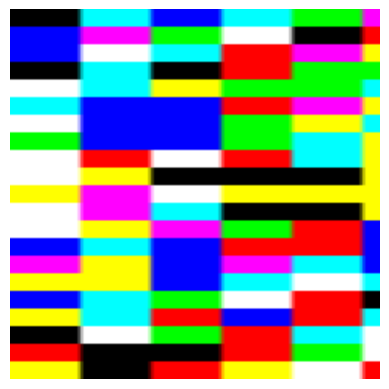

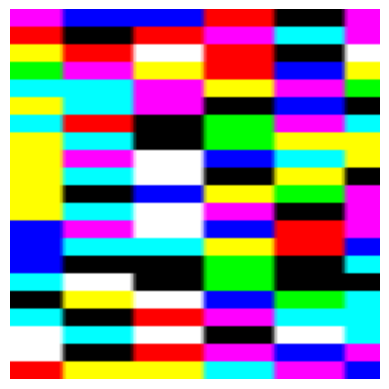

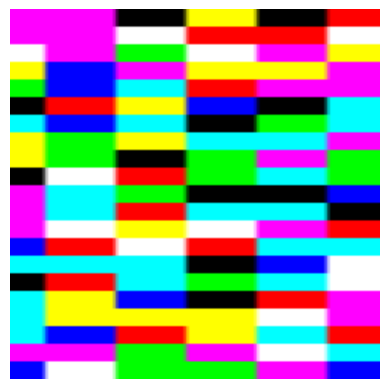

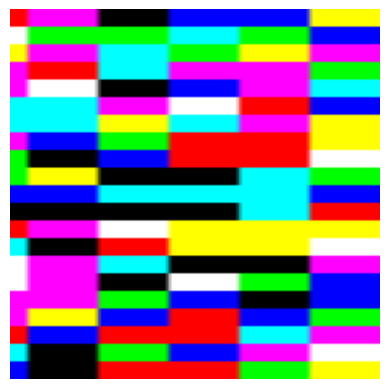

((126, 126, 3), (126, 126, 3), (126, 126, 3), (126, 126, 3))

In [20]:
# Split image into 4 equal parts
height, width, channels = XOR_img.shape
# height, width, channels = exch_img.shape
quarter_width = int(width//4)

img1, img2, img3, img4 = XOR_img[:, 0:quarter_width], XOR_img[:, quarter_width: 2*quarter_width], XOR_img[:, 2*quarter_width:3*quarter_width], XOR_img[:, 3*quarter_width:]
# img1, img2, img3, img4 = exch_img[:, 0:quarter_width], exch_img[:, quarter_width: 2*quarter_width], exch_img[:, 2*quarter_width:3*quarter_width], exch_img[:, 3*quarter_width:]


plt.imshow(img1)
plt.axis('off')
plt.show()
plt.imshow(img2)
plt.axis('off')
plt.show()
plt.imshow(img3)
plt.axis('off')
plt.show()
plt.imshow(img4)
plt.axis('off')
plt.show()

plt.imsave('/content/atomic_steps/step3.1.1.png', img1)
plt.imsave('/content/atomic_steps/step3.1.2.png', img2)
plt.imsave('/content/atomic_steps/step3.1.3.png', img3)
plt.imsave('/content/atomic_steps/step3.1.4.png', img4)
img1.shape, img2.shape, img3.shape, img4.shape

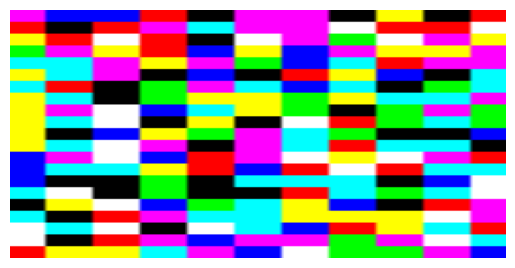

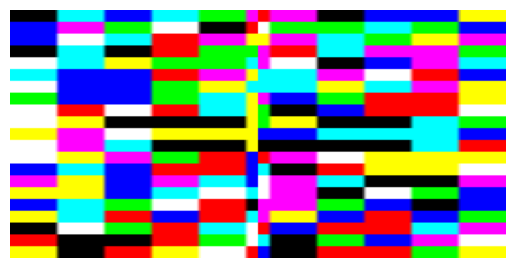

((126, 252, 3), (126, 252, 3))

In [21]:
# Create new top and bottom images by merging middle two images and two outermost images respectively
top_img = cv2.hconcat([img2, img3])
bottom_img = cv2.hconcat([img1, img4])

plt.imshow(top_img)
plt.axis('off')
plt.show()
plt.imshow(bottom_img)
plt.axis('off')
plt.show()

plt.imsave('/content/atomic_steps/step3.2.1.png', top_img)
plt.imsave('/content/atomic_steps/step3.2.2.png', bottom_img)
top_img.shape, bottom_img.shape

(252, 252, 3)

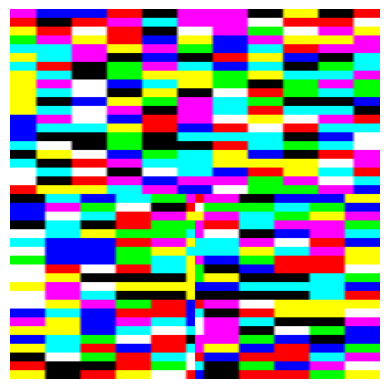

In [22]:
# Form the image of originaly shape by concatenating the two images vertically
new_img = cv2.vconcat([top_img, bottom_img])
plt.imshow(new_img)
plt.axis('off')
plt.imsave('/content/atomic_steps/step3.3.png', new_img)
new_img.shape

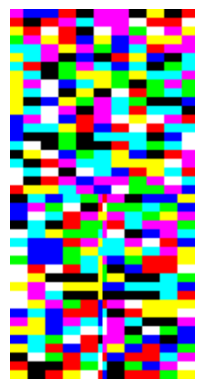

(504, 252, 3)

In [24]:
# Expand vertically
new_img = cv2.resize(new_img, (img.shape[0], 2*img.shape[1]))

plt.imshow(new_img)
plt.axis('off')
plt.show()
plt.imsave('/content/atomic_steps/step4.png', new_img)
new_img.shape

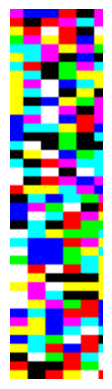

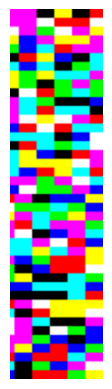

((504, 126, 3), (504, 126, 3))

In [25]:
# Split image horizontally into left image and right image
height, width, channels = new_img.shape
half_width = width//2

left_img, right_img = new_img[:, :half_width], new_img[:, half_width:]

plt.imshow(left_img)
plt.axis('off')
plt.show()

plt.imshow(right_img)
plt.axis('off')
plt.show()
plt.imsave('/content/atomic_steps/step5.1.png', left_img)
plt.imsave('/content/atomic_steps/step5.2.png', right_img)
left_img.shape, right_img.shape

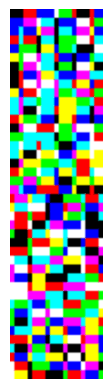

In [27]:
# # Perform XOR operation between left and right section of images
XOR_img = left_img ^ right_img
# exch_img = cv2.vconcat([right_img, left_img])

plt.imshow(XOR_img)
# plt.imshow(exch_img)

plt.axis('off')
plt.imsave('/content/atomic_steps/step5.3.png', XOR_img)
# XOR_img.shape

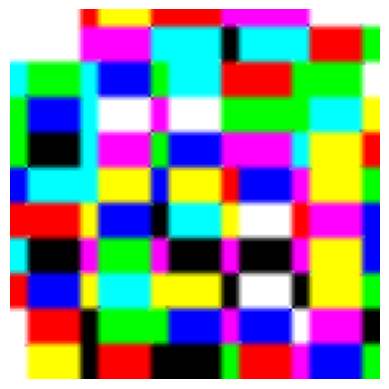

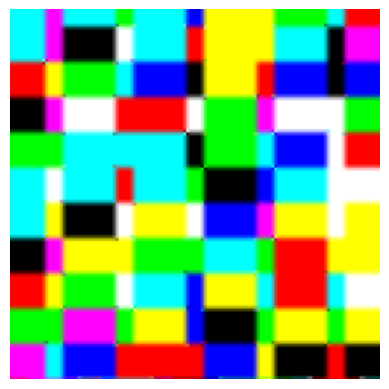

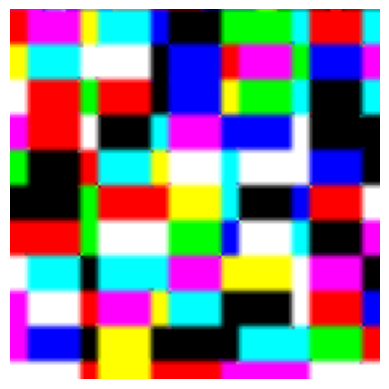

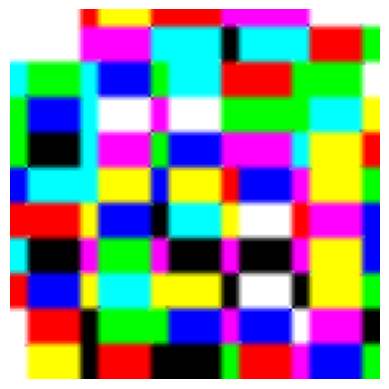

((126, 126, 3), (126, 126, 3), (126, 126, 3), (126, 126, 3))

In [33]:
# Split image into 4 equal parts
height, width, channels = XOR_img.shape
# height, width, channels = exch_img.shape
quarter_height = height//4

img1, img2, img3, img4 = XOR_img[3*quarter_height:, :], XOR_img[quarter_height:2*quarter_height, :], XOR_img[2*quarter_height:3*quarter_height, :], XOR_img[3*quarter_height:, :]
# img1, img2, img3, img4 = exch_img[0:quarter_height, :], exch_img[quarter_height:2*quarter_height, :], exch_img[2*quarter_height:3*quarter_height, :], exch_img[3*quarter_height:, :]

plt.imshow(img1)
plt.axis('off')
plt.show()

plt.imshow(img2)
plt.axis('off')
plt.show()

plt.imshow(img3)
plt.axis('off')
plt.show()

plt.imshow(img4)
plt.axis('off')
plt.show()

plt.imsave('/content/atomic_steps/step6.1.1.png', img1)
plt.imsave('/content/atomic_steps/step6.1.2.png', img2)
plt.imsave('/content/atomic_steps/step6.1.3.png', img3)
plt.imsave('/content/atomic_steps/step6.1.4.png', img4)
img1.shape, img2.shape, img3.shape, img4.shape

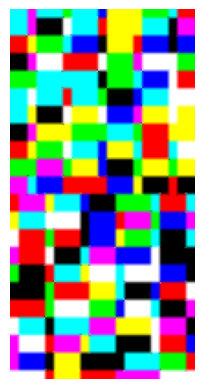

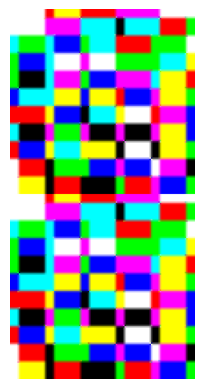

((252, 126, 3), (252, 126, 3))

In [34]:
# Create new left and right images by merging middle two images and two outermost images respectively
left_img = cv2.vconcat([img2, img3])
right_img = cv2.vconcat([img1, img4])

plt.imshow(left_img)
plt.axis('off')
plt.show()

plt.imshow(right_img)
plt.axis('off')
plt.show()

plt.imsave('/content/atomic_steps/step6.2.1.png', left_img)
plt.imsave('/content/atomic_steps/step6.2.2.png', right_img)
left_img.shape, right_img.shape

(252, 252, 3)

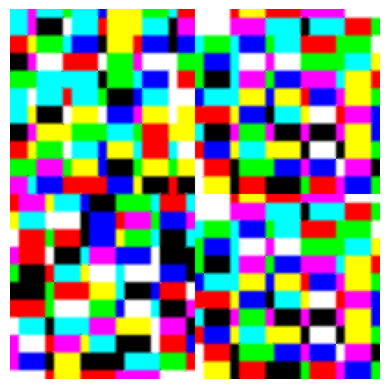

In [35]:
# Form the image of originaly shape by concatenating the two images vertically
new_img = cv2.hconcat([left_img, right_img])
plt.imshow(new_img)
plt.axis('off')
plt.imsave('/content/atomic_steps/step6.3.png', new_img)
new_img.shape